# Basemap fundamentals

**Reference:** https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html

Any map created with the Basemap library must start with the creation of a Basemap instance: `map = Basemap()`

```python
mpl_toolkits.basemap.Basemap(llcrnrlon=None, llcrnrlat=None, 
                            urcrnrlon=None, urcrnrlat=None, 
                            llcrnrx=None, llcrnry=None, 
                            urcrnrx=None, urcrnry=None, 
                            width=None, height=None, 
                            projection='cyl', 
                            resolution='c', 
                            area_thresh=None, 
                            rsphere=6370997.0, 
                            ellps=None, 
                            lat_ts=None, 
                            lat_1=None, lat_2=None, 
                            lat_0=None, lon_0=None, 
                            lon_1=None, lon_2=None, 
                            o_lon_p=None, o_lat_p=None, 
                            k_0=None, 
                            no_rot=False, 
                            suppress_ticks=True, 
                            satellite_height=35786000, 
                            boundinglat=None, 
                            fix_aspect=True, 
                            anchor=’C’, 
                            celestial=False, 
                            round=False, 
                            epsg=None, 
                            ax=None)
```
The class constructor has many possible arguments, and all of them are optional.
- `resolution`: The resolution of the included coastlines, lakes, and so on. 
  - The options are 
    - `c` (crude, the default), 
    - `l` (low), 
    - `i` (intermediate), 
    - `h` (high), 
    - `f` (full) or None.
  - None option is a good one if a Shapefile will be used instead of the included files, since no data must be loaded and the performance rises a lot.
- `area_thresh`: The threshold under what no coast line or lake will be drawn. Default 10000,1000,100,10,1 for resolution `c`, `l`, `i`, `h`, `f`.
- `rsphere`: Radius of the sphere to be used in the projections. Default is 6370997 meters. If a sequence is given, the first two elements are taken as the radius of the ellipsoid.
- `ellps`: An ellipsoid name, such as `WGS84`. The allowed values are defined at `pyproj.pj_ellps`
- `suppress_ticks`: Suppress automatic drawing of axis ticks and labels in map projection coordinates
- `fix_aspect`: Fix aspect ratio of plot to match aspect ratio of map projection region (default True)
- `anchor`: The place in the plot where the map is anchored. Default is `C`, which means map is centered. Allowed values are `C`, `SW`, `S`, `SE`, `E`, `NE`, `N`, `NW`, and `W`
- `celestial`: Use the astronomical conventions for longitude (i.e. negative longitudes to the east of `0`). Default False. Implies `resolution=None`
- `ax`: set default axes instance

## Passing the bounding box
The bounding box is passed as a parameter to the `draw` method. The following arguments are used to set the extent of the map.

1. The first way to set the extent is by defining the map bounding box in geographical coordinates:
   
    | Argument	| Description |
    |-----------|-------------|
    | `llcrnrlon`	| The lower left corner geographical longitude |
    | `llcrnrlat`	| The lower left corner geographical latitude |
    | `urcrnrlon`	| The upper right corner geographical longitude |
    | `urcrnrlat`	| The upper right corner geographical latitude |

2. An other option is setting the bounding box, but using the projected units:

    | Argument	| Description |
    |-----------|-------------|
    | `llcrnrx`	| The lower left corner x coordinate, in the projection units |
    | `llcrnry`	| The lower left corner y coordinate, in the projection units |
    | `urcrnrx`	| The upper right corner x coordinate, in the projection units |
    | `urcrnry`	| The upper right corner y coordinate, in the projection units |

3. Finally, the last option is to set the bounding box giving the center point in geographical coordinates, and the width and height of the domain in the projection units

    | Argument	| Description |
    |-----------|-------------|
    | `width`	| The width of the map in the projection units |
    | `height`	| The height of the map in the projection units |
    | `lon_0`	| The longitude of the center of the map |
    | `lat_0`	| The latitude of the center of the map |

4. Using the Basemap instance to convert units
   
   The basemap instance can be used to calculate positions on the map and the inverse operation, converting positions on the map to geographical coordinates.
    ```python 
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt

    map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)

    print(map(10, 50))
    print(map(20015077.3712, 20015077.3712, inverse=True))
    ```

### When a Basemap object is created, has some fields with data:

- Some of them contain the polygons with the resolution set with the resolution parameter. They are all matplotlib Polygon objects:
  - `landpolygons`
  - `lakepolygons`
  - `boundarylons`
  - `coastpolygons`
  - `coastpolygontypes`
  - `coastsegs`

- Other fields give information about the used projection
  - `proj4string`: A string that can be used with proj4 (or GDAL) to have the used projection definition
  - `projection`: The code of the used projection, as indicated in the projection argument
  - `projparams`: A dict with the projection parameters. The ones passed and the ones put by default by Basemap
  - `rmajor`: The semi-major axis of the ellipsoid used with the projection
  - `rminor`: The semi-minor axis of the ellipsoid used with the projection
  - `xmax`, `ymax`, `xmin`, `ymin`: The bounding box in the projection units
  - `anchor`: The point on the map where the axis coordinates start. By default is the center of the map, but can be changed to any corner or side
  - `celestial`: indicates if the longitudes west of Greenwich are negative

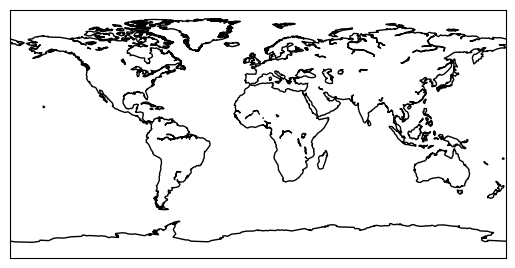

<Figure size 640x480 with 0 Axes>

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Without passing any option, the map has the Plate Carrée projection centered at longitude and latitude = 0
map = Basemap()

map.drawcoastlines()

plt.show()
plt.savefig('test.png')

## Changing the projection
just add the projection argument and `lat_0` and `lon_0` to the Basemap contructor.

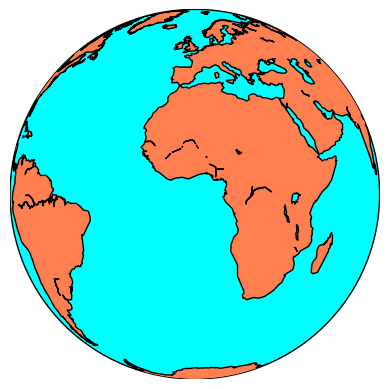

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')

map.drawcoastlines()

plt.show()

**annotate:** 
- `annotate(*args, **kwargs)`: Creates text with an arrow indicating the point of interest. 

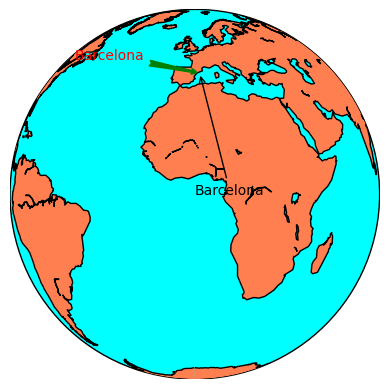

In [61]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()


x, y = map(2, 41)
x2, y2 = (-90, 10)

plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                color='r',
                arrowprops=dict(arrowstyle="fancy", color='g')
                )

x2, y2 = map(0, 0)
plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->")
                )
plt.show()

## Managing projections
- Default value is `cyl` =   **Cylindrical Equidistant projection** also known as **Equirectangular projection** or **Plate Carrée**

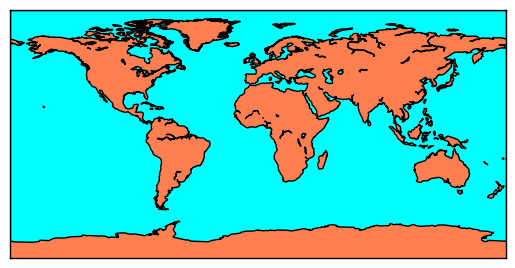

In [6]:
map = Basemap(projection='cyl')

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

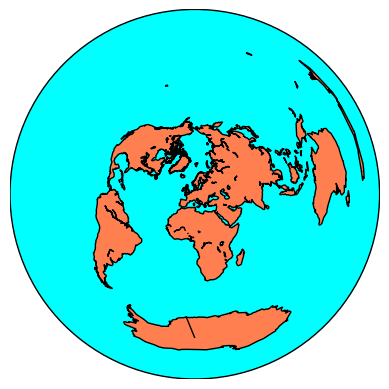

In [7]:
# This projection requires extra arguments
## The map has now an equidistant projection centered at longitude = 10 and latitude = 50, which is over Europe.
map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

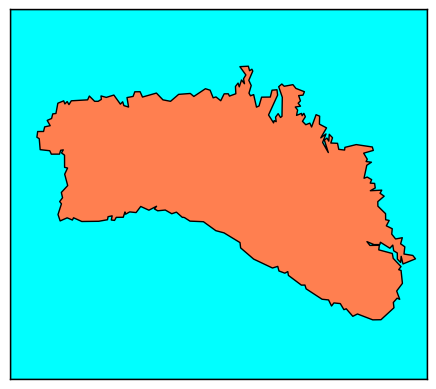

In [11]:
# Create a Basemap instance with the specified boundaries and resolution
map = Basemap(llcrnrlon=3.75, llcrnrlat=39.75,
              urcrnrlon=4.35, urcrnrlat=40.15,
              resolution='h', epsg=5520)

# Draw the map boundary and fill in the continents
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral', lake_color='aqua')
map.drawcoastlines()

# Show the plot
plt.show()


If you need different resolutions, you can also specify `c`, `l`, or `i` in the resolution parameter, which correspond to crude, low, and intermediate resolutions, respectively.

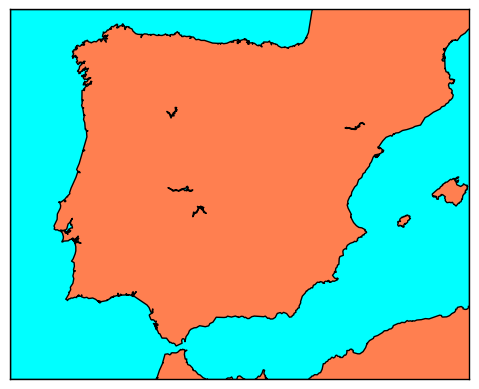

In [12]:
map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,
              urcrnrlon=4.,urcrnrlat=44.,
              resolution='i', 
              projection='tmerc', 
              lat_0 = 39.5, lon_0 = -3.25)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

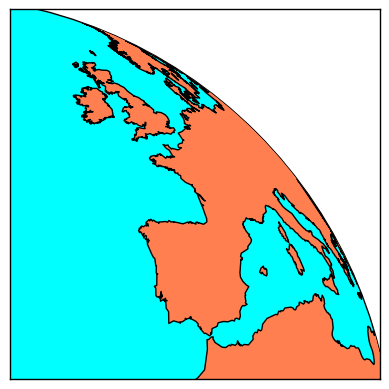

In [16]:
map = Basemap(llcrnrx=500000.,llcrnry=500000.,
              urcrnrx=2700000.,urcrnry=2700000.,
              resolution='l', 
              satellite_height=3000000.,
              projection='nsper', 
              lat_0 = 30., lon_0 = -27.
             )

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

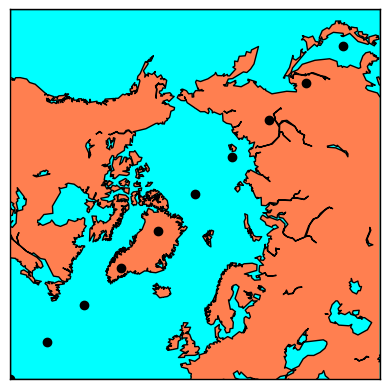

In [17]:
map = Basemap(projection='aeqd',
              lon_0 = 0,
              lat_0 = 90,
              width = 10000000, 
              height = 10000000)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

for i in range(0, 10000000, 1000000):
    map.plot(i, i, marker='o',color='k')

plt.show()

## Drawing a point in a map

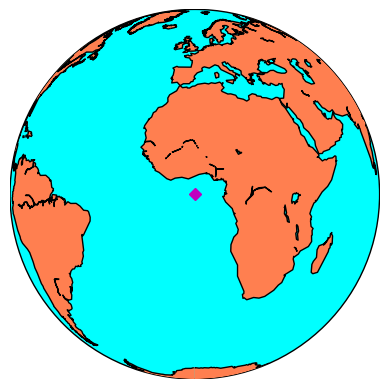

In [25]:
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

x, y = map(0, 0)

map.plot(x, y, marker='D',color='m')

plt.show()

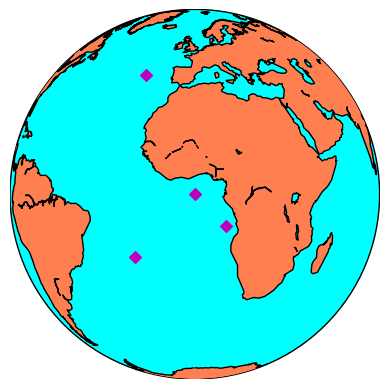

In [26]:
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

lons = [0, 10, -20, -20]
lats = [0, -10, 40, -20]

x, y = map(lons, lats)

map.scatter(x, y, marker='D',color='m')

plt.show()

## Plotting raster data

There are two main methods for plotting a raster, contour/contourf, that plots contour lines or filled contour lines (isobands) and pcolor/pcolormesh, that creates a pseudo-color plot.
- **contourf:** The contourf method will take the x, y and data matrices and plot them in the default colormap, called jet, and an automatic number of levels
  - **contour:** The number of levels can be defined after the data array, in the contour section. This can be done in two ways:
      - An integer indicating the number of levels. The extreme values of the data array will indicate the extremes of the color scale
      - A list with the values for each level. The range function is useful to set them i.e. range(0, 3000, 100) to set a level each 100 units
- **pcolormesh:**

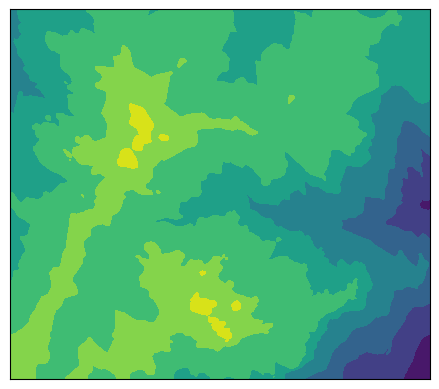

In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

map = Basemap(projection='tmerc', 
              lat_0=0, lon_0=3,
              llcrnrlon=1.819757266426611, 
              llcrnrlat=41.583851612359275, 
              urcrnrlon=1.841589961763497, 
              urcrnrlat=41.598674173123)

ds = gdal.Open("dem.tiff")
data = ds.ReadAsArray()

x = linspace(0, map.urcrnrx, data.shape[1])   # a numpy function that creates an array from an initial value to an end value with n elements
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)                   # a numpy function that take two arrays and create a matrix with them

map.contourf(xx, yy, data)

plt.show()

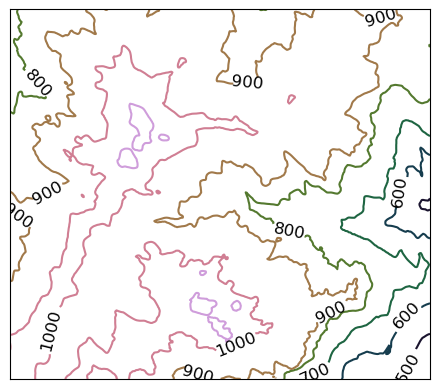

In [30]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

map = Basemap(projection='tmerc', 
              lat_0=0, lon_0=3,
              llcrnrlon=1.819757266426611, 
              llcrnrlat=41.583851612359275, 
              urcrnrlon=1.841589961763497, 
              urcrnrlat=41.598674173123)

ds = gdal.Open("dem.tiff")
data = ds.ReadAsArray()

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

cs = map.contour(xx, yy, data, range(400, 1500, 100), cmap = plt.cm.cubehelix)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=12, colors='k')

plt.show()

The labels can be set to the contour method (but not to contourf)

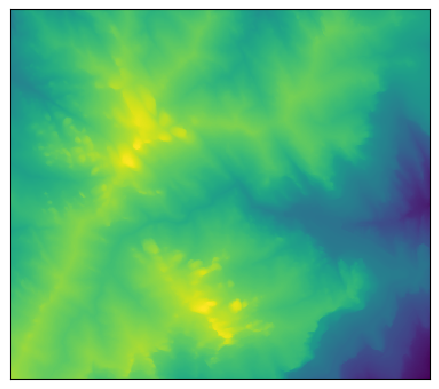

In [32]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

map = Basemap(projection='tmerc', 
              lat_0=0, lon_0=3,
              llcrnrlon=1.819757266426611, 
              llcrnrlat=41.583851612359275, 
              urcrnrlon=1.841589961763497, 
              urcrnrlat=41.598674173123)

ds = gdal.Open("dem.tiff")
data = ds.ReadAsArray()

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

map.pcolormesh(xx, yy, data)

plt.show()

- Again the data must be prepared as in the contourf case and the colormap can be changed as in the contour example

### Calculating the position of a point on the map

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='aeqd', lon_0 = 10, lat_0 = 50)

print(map(10, 50))

(20015077.3712426, 20015077.3712426)


In [36]:

print(map(20015077.3712, 20015077.3712, inverse=True))

(10.0, 50.0)


When inverse is False, the input is a point in longitude and latitude, and the output is the point in the map coordinates. When inverse is True, the behavior is the opposite.

## Working with shapefiles

The way used by Basemap to handle vectorial files is quite different from other libraries, and deserves some attention.

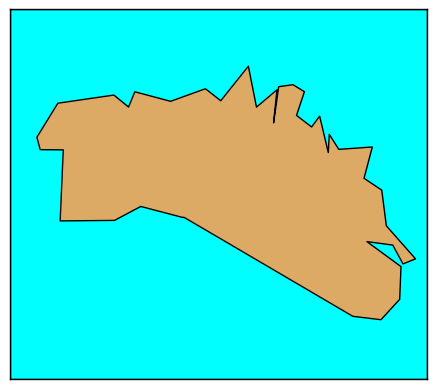

In [44]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create Basemap instance
map = Basemap(llcrnrlon=3.75, llcrnrlat=39.75, urcrnrlon=4.35, urcrnrlat=40.15, projection='tmerc', lat_0 = 39.5, lon_0 = 1, resolution='i', epsg=5520)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66', lake_color='aqua')
map.drawcoastlines()

# Specify a different encoding (e.g., 'ISO-8859-1')
map.readshapefile('comarques', 'comarques', default_encoding='ISO-8859-1')

plt.show()

### Reading point data
Plotting points is a bit more complicated. First, the shapefile is read, and then the points can be plotted using scatter, plot or the matplotlib function that fits better the needs. 

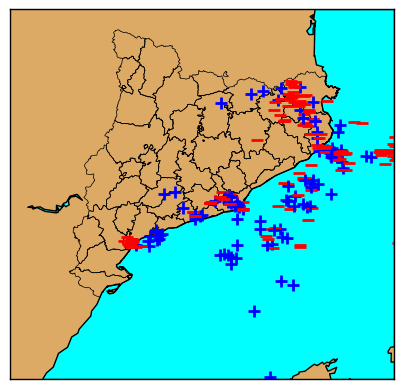

In [51]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create the Basemap instance
map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0=39.5, lon_0=1)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66', lake_color='aqua')
map.drawcoastlines()

# Load the shapefile data
map.readshapefile('comarques', 'comarques', default_encoding='ISO-8859-1')
lightning_info = map.readshapefile('lightnings', 'lightnings')

# plots
for info, lightning in zip(map.lightnings_info, map.lightnings):
    amplitude = float(info['amplitude'])
    
    if amplitude < 0:
        marker = '_'
        color = 'red'  # Color for negative amplitude
    else:
        marker = '+'
        color = 'blue'  # Color for positive amplitude
    
    # Plot the lightning strikes
    map.plot(lightning[0], lightning[1], marker=marker, color=color, markersize=8, markeredgewidth=2)

plt.show()


- The second parameter has been named lightnings, and the Basemap instance map, so the shapefile elements can be accessed using `map.lightnings` for geometries and `map.lightnings_info` for accessing the elements fields
- The shapefile method returns a sequence with the number of elements, the geometry type with the codes defined here and the bounding box
Line 17 shows a possible way to iterate all the elements
    - zip will join each geometry with its field values
    - each element can be iterated with a for as when iterating a dict
- In the example, a field named amplitude can be used to guess if the lightning had positive or negative current and draw a different symbol for each case
- The points are plotted with the method plot, using the marker attribute to change the symbol

### Polygon information

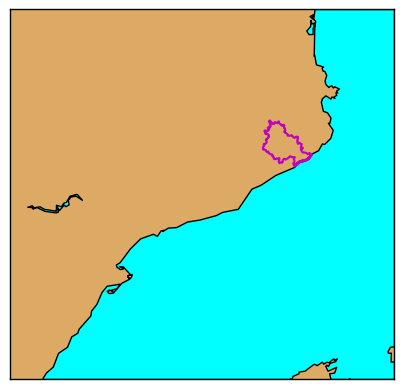

In [54]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('comarques', 'comarques', default_encoding='ISO-8859-1', drawbounds = False)

for info, shape in zip(map.comarques_info, map.comarques):
    if info['nombre'] == 'Selva':
        x, y = zip(*shape) 
        map.plot(x, y, marker=None,color='m')
plt.show()

### Filling polygons
The basic way to plot a shapefile doesn’t fill the polygons if this is the shape type. Here’s how to do it:

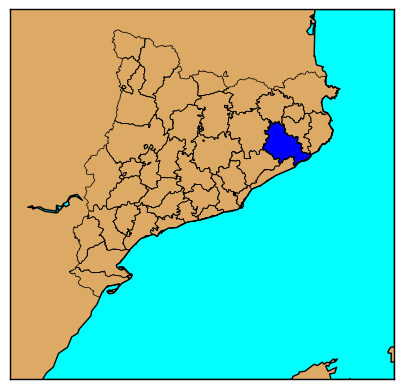

In [60]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)

# Create the Basemap instance
map = Basemap(llcrnrlon=-0.5, llcrnrlat=39.8, urcrnrlon=4., urcrnrlat=43.,
              resolution='i', projection='tmerc', lat_0=39.5, lon_0=1)

# Draw map boundary, continents, and coastlines
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66', lake_color='aqua')
map.drawcoastlines()

# Read shapefile and skip drawing boundaries
map.readshapefile('comarques', 'comarques', default_encoding='ISO-8859-1', drawbounds=True) # For false, other shapes are not shown

# Create a list to hold patches for polygons
patches = []

# Iterate through the shapefile info and shapes
for info, shape in zip(map.comarques_info, map.comarques):
    if info['nombre'] == 'Selva':  # Filter for a specific region
        patches.append(Polygon(np.array(shape)))  # Append the polygon without the third argument

# Add the collection of patches to the axis
ax.add_collection(PatchCollection(patches, facecolor='b', edgecolor='k', linewidths=1., zorder=2))

# Show the plot
plt.show()


matplotlib uses a class called `PatchCollection`, which is a set shaped to add filled polygons

- **Plots wind barbs on the map:**
  
  `barbs(x, y, u, v, *args, **kwargs)`: 
  - x and y give the positions of the grid data if the latlon argument is true, the values are supposed to be in geographical coordinates. If not, in the map coordinates
  - u and v are the left-right and up-down magnitudes of the wind in knots (the values to create the barbs are 5, 10, 15 and so on).

c:\Users\hp\.conda\envs\gdal_env\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


IndexError: index 60 is out of bounds for axis 0 with size 60

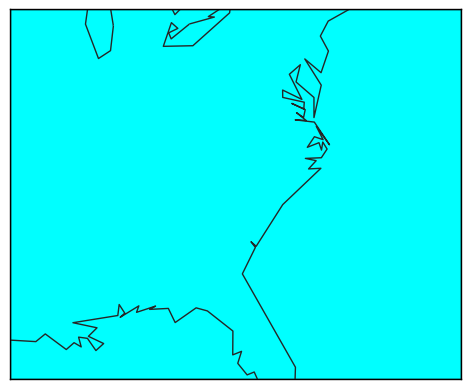

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

# Create the basemap
map = Basemap(llcrnrlon=-93.7, llcrnrlat=28., urcrnrlon=-66.1, urcrnrlat=39.5,
              projection='lcc', lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)

# Open the data using GDAL
ds = gdal.Open("wrf.tiff")

# Read the raster data
lons = ds.GetRasterBand(4).ReadAsArray()
lats = ds.GetRasterBand(5).ReadAsArray()
u10 = ds.GetRasterBand(1).ReadAsArray()
v10 = ds.GetRasterBand(2).ReadAsArray()

# Convert longitude and latitude to map projection coordinates
x, y = map(lons, lats)

# Create indices to downsample the data for barbs
yy = np.arange(0, y.shape[0], 4)
xx = np.arange(0, x.shape[1], 4)

# Ensure the meshgrid indices don't exceed array dimensions
yy = np.clip(yy, 0, y.shape[0]-1)
xx = np.clip(xx, 0, x.shape[1]-1)

# Create the meshgrid for plotting
points = np.meshgrid(yy, xx)

# Draw the map
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#cc9955', lake_color='aqua', zorder=0)
map.drawcoastlines(color='0.15')

# Plot the wind barbs
map.barbs(x[points], y[points], u10[points], v10[points], 
          pivot='middle', barbcolor='#333333')

plt.show()

In [3]:
import pandas as pd
(pd.DataFrame(lons)).head(2)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-92.599670,-92.210876,-91.822327,-91.434082,-91.046143,-90.658539,-90.271271,-89.884369,-89.497833,-89.111725,...,-69.275482,-68.933472,-68.592590,-68.252808,-67.914124,-67.576599,-67.240173,-66.904907,-66.570801,-66.237823
1,-92.625824,-92.238892,-91.852203,-91.465820,-91.079742,-90.693970,-90.308563,-89.923523,-89.538818,-89.154541,...,-69.403381,-69.062622,-68.722961,-68.384399,-68.046936,-67.710602,-67.375366,-67.041290,-66.708313,-66.376495


In [4]:
(pd.DataFrame(lats)).head(2)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,44.237015,44.217510,44.196663,44.174461,44.150909,44.126015,44.099773,44.072178,44.043259,44.012981,...,40.481670,40.383423,40.284081,40.183655,40.082146,39.979557,39.875900,39.771183,39.665409,39.558594
1,43.958363,43.938965,43.918213,43.896126,43.872692,43.847916,43.821804,43.794353,43.765568,43.735455,...,40.221092,40.123299,40.024429,39.924465,39.823425,39.721313,39.618141,39.513905,39.408623,39.302288


In [5]:
(pd.DataFrame(u10)).head(2)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,1.592459,1.356105,0.939473,0.394462,0.414021,0.832416,0.983199,0.898587,1.025880,1.407843,...,3.211931,3.865422,4.550207,5.224380,5.768069,6.044955,6.088743,6.007128,5.932091,5.775259
1,2.327897,2.640089,2.143630,1.493911,1.202558,1.502886,1.555532,1.186971,1.076795,1.369034,...,3.088588,3.905388,4.651758,5.493118,6.351741,6.979805,7.378299,7.612574,7.685601,6.892019


In [6]:

(pd.DataFrame(v10)).head(2)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,2.666740,2.470257,2.269243,2.046482,1.810300,1.570236,1.351358,1.121433,1.072119,1.303194,...,-10.908017,-9.554719,-7.460310,-4.737340,-1.323732,2.279129,5.212088,7.279655,8.394688,8.744910
1,3.090922,3.302105,2.907782,2.538589,2.275927,2.082018,1.815268,1.465818,1.328554,1.407077,...,-10.822149,-9.294544,-7.160253,-4.426875,-0.964515,2.608610,5.428538,7.309469,8.157628,8.451869
